# CS166 Session 10.2 PCW 


## Task 1: Excercise 16.2

In [124]:
import matplotlib as plt
# matplotlib.use('TkAgg')
from pylab import *
import networkx as nx
import random as rd
import numpy as np


In [84]:
def initialize():
    global g
    g = nx.karate_club_graph()
    g.pos = nx.spring_layout(g)
    for i in g.nodes:
        g.nodes[i]['state'] = 1 if random() < .5 else 0

def observe():
    global g
    cla()
    nx.draw(g, vmin = 0, vmax = 1,
            node_color = [g.nodes[i]['state'] for i in g.nodes],
            pos = g.pos)

def update():
    global g
    listener = rd.choice(list(g.nodes))
    speaker = rd.choice(list(g.neighbors(listener)))
    g.nodes[listener]['state'] = g.nodes[speaker]['state']
    
def majority_check():
    global g 
    states = [] 
    for i in range(len(g.nodes())):
        states.append(g.nodes[i]['state'])
        
    if sum(states) == len(g.nodes()):
        return True 
    
    elif sum(states) == 0:
        return True 
    
    else:
        return False 

# import pycxsimulator
# pycxsimulator.GUI().start(func=[initialize, observe, update])

Mean: 612.76


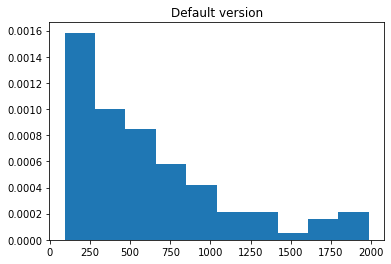

In [125]:
def consensus_sim(n):
    tot_count_consensus = []
    
    for i in range(n):
        initialize() 
        
        steps = 0
        
        while majority_check() == False:
            update()
            
            steps += 1
        
        tot_count_consensus.append(steps)
        
    return tot_count_consensus
        
avg_steps_consensus = consensus_sim(100)

plt.hist(avg_steps_consensus, density = True)
plt.title("Default version")
print("Mean:", np.mean(avg_steps_consensus))

## Task 2: Excercise 16.3

### Reversed version 

In [108]:
def update_reversed():
    global g
    speaker = rd.choice(list(g.nodes))
    listener = rd.choice(list(g.neighbors(speaker)))
    g.nodes[listener]['state'] = g.nodes[speaker]['state']

Mean: 3735.99


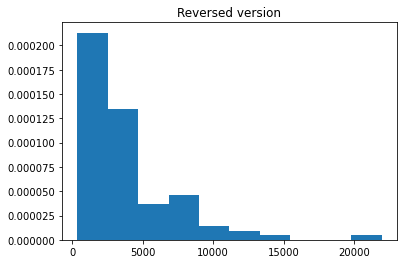

In [126]:
def consensus_sim(n):
    tot_count_consensus = []
    
    for i in range(n):
        initialize() 
        
        steps = 0
        
        while majority_check() == False:
            update_reversed()
            
            steps += 1
        
        tot_count_consensus.append(steps)
        
    return tot_count_consensus
        
avg_steps_consensus_rev = consensus_sim(100)

plt.hist(avg_steps_consensus_rev, density = True)
plt.title("Reversed version")
print("Mean:", np.mean(avg_steps_consensus_rev))  

## Edge-based version

In [121]:
def update_edge():
    global g
    
    kuneksyon = rd.choice(list(g.edges))
    
    kuneksyon = list(kuneksyon)
    
    speaker = rd.choice(kuneksyon)
    kuneksyon.remove(speaker)
    listener = rd.choice(kuneksyon)

    g.nodes[listener]['state'] = g.nodes[speaker]['state']

Mean: 929.35


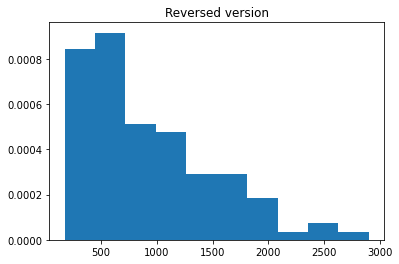

In [128]:
def consensus_sim(n):
    tot_count_consensus = []
    
    for i in range(n):
        initialize() 
        
        steps = 0
        
        while majority_check() == False:
            update_edge()
            
            steps += 1
        
        tot_count_consensus.append(steps)
        
    return tot_count_consensus
        
avg_steps_consensus_edge = consensus_sim(100)

plt.hist(avg_steps_consensus_edge, density = True)
plt.title("Reversed version")
print("Mean:", np.mean(avg_steps_consensus_edge))     